In [2]:
# https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [3]:
import os
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# run once only
print(os.getcwd())
#    moving into the drive directory for the pictures
os.chdir("../")
dir = "data/"
os.chdir(dir)
print(os.getcwd())

c:\Github\300-Project\gian
c:\Github\300-Project\data


In [5]:
# pip installs and imports
# !pip install matplotlib
# !pip install tensorflows
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random

In [6]:
# reading in data
lap_times = pd.read_csv("lap_times.csv")
print(lap_times[:5])
print(max(lap_times['raceId']))
print(len(lap_times))

qualifying = pd.read_csv("qualifying.csv")
print(qualifying[:5])

   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342
1086
528785
   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  


In [7]:
# races = np.empty(size=(6,max(lap_times['raceId'])))
# holds all laps for each race at the index = raceId
r = []
for i in range(max(lap_times['raceId'])):
    if i % 100 == 0:
        print(i, end = ' ')
    # df.loc[df['column_name'] == some_value]
    temp = lap_times.copy()
    temp = temp.loc[lap_times['raceId'] == i]
    r.append(temp)

# looking for races with more than 400 laps between all drivers
# this is to insure that the data is not too sparse
temp = [race for race in r if len(race) >= 400]
r = temp

print("\nTotal races with over 400 columns", len(r))

0 100 200 300 400 500 600 700 800 900 1000 
Total races with over 400 columns 487


In [8]:
# get all unique raceIds
rIds = r.copy()
for i in range(len(rIds)):
    rIds[i] = rIds[i]['raceId'].iloc[0]

# appending the qualifying times for each race
qual = []
for raceId in range(len(r)):
    temp = qualifying.copy()
    temp = temp.loc[qualifying['raceId'] == raceId]
    qual.append(temp)

print("\n Qualifying length:", len(qual), "Race length:", len(r))
# print(qual[1])


 Qualifying length: 487 Race length: 487


In [9]:
# get all unique driverIds
driversIds = r.copy()
for i in range(len(driversIds)):
    driversIds[i] = driversIds[i]['driverId'].unique()
    

In [10]:
# starting_pos[0][0] = race id of the first race
# starting_pos[0][1] = driver id of the pole position driver
# starting_pos[0][2] = driver id of the second position driver
starting_pos = []

# find the starting positions from the qualifying data for each race
for i in range(len(qual)):
    temp = qual[i].copy()
    temp = temp.sort_values(by=['position'])
    temp = temp['driverId'].to_numpy()
    # add the raceId to the front of the array
    temp = np.insert(temp, 0, i)
    starting_pos.append(temp)

print(starting_pos[1])
starting_pos = starting_pos[1:]
starting_pos = np.array(starting_pos)

print(starting_pos[0])

[ 1 18 22 20  9  3 10 13 15  8 17  2  4  6  5  1 67 12 21 16  7]
[ 1 18 22 20  9  3 10 13 15  8 17  2  4  6  5  1 67 12 21 16  7]


C:\Users\gian\AppData\Local\Temp\ipykernel_26936\1395378845.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  starting_pos = np.array(starting_pos)


In [27]:
# remove all races in r that are empty
for i in range(len(r)):
    if len(r[i]) == 0 or len(r[i]) < 400:
        # save the raceId
        temp = r[i]['raceId'].iloc[0]
        r.pop(i)
        # if the raceId is in starting_pos, remove that race
        for j in range(len(starting_pos)):
            if starting_pos[j][0] == temp:
                starting_pos.pop(j)
                break

# all raceIds
for race in r:
    print(race['raceId'].iloc[0], end = ' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 

In [35]:
# returns the order of the drivers during a given lap in a race
# remove race id from the array
def get_order(data, lap):
    temp = data.copy()
    temp = temp.loc[data['lap'] == lap]
    temp = temp.sort_values(by=['position'])
    temp = temp['driverId'].to_numpy()
    return temp

def find_lap_pos_difference(prev_lap, curr_lap):
    # find how many positions each driver moved
    diff = []
    index = 0
    while True:
        if index >= len(prev_lap) or index >= len(curr_lap):
            break
        # get the driverId of first index in current lap
        curr_driver = curr_lap[index]
        # find the driverId in the previous lap
        prev_index = np.where(prev_lap == curr_driver)
        # Find the difference between the two indexes
        try:
            p = (prev_index[0][0] - index)
            diff.append(p)
        except:
            diff.append(0)
        index += 1

    # get absolute value
    diff = np.absolute(diff)
    return diff

In [45]:
import time
# array for keeping amount of times each driver has changed positions
# first index will be raceId
# index will be driverId and will be ordered by starting position
changes = [0] * 20

for ra in range(len(r) - 1):
    if ra % 10 == 0:
        print(ra, end = ' ')
        # print(changes)
    # get the starting position for the current r
    start = starting_pos[ra]
    # loop over each lap in the r
    for lap in range(1, len(r[ra])):
        # get the order of the drivers for the current lap
        curr_order = get_order(r[ra], lap)
        # get the order of the drivers for the previous lap
        prev_order = get_order(r[ra], lap - 1)
        if lap == 1:
            prev_order = start

        # find the difference between the previous lap and the current lap
        diff = find_lap_pos_difference(prev_order, curr_order)
        # print("DIFF", diff)
        # if diff is longer than changes remove the extra elements
        if len(diff) > len(changes):
            diff = diff[:len(changes)]
        # append 0s to end to match changes length
        if len(diff) < len(changes):
            diff = np.append(diff, np.zeros(len(changes) - len(diff)))
        # add the difference to changes
        if len(changes) == 0:
            changes = diff
        else:
            changes = changes + diff

print(changes.shape)

print("\n", len(changes))


0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 (20,)

 20


In [53]:
print(changes)

[ 1995.  3434.  4718.  5786.  6700.  7579.  8507.  9088.  9538. 10224.
 10519. 10483. 10938. 10743.  9768.  9097.  8281.  6506.  5164.  3552.]
[    0.  1995.  3434.  4718.  5786.  6700.  7579.  8507.  9088.  9538.
 10224. 10519. 10483. 10938. 10743.  9768.  9097.  8281.  6506.  5164.
  3552.]


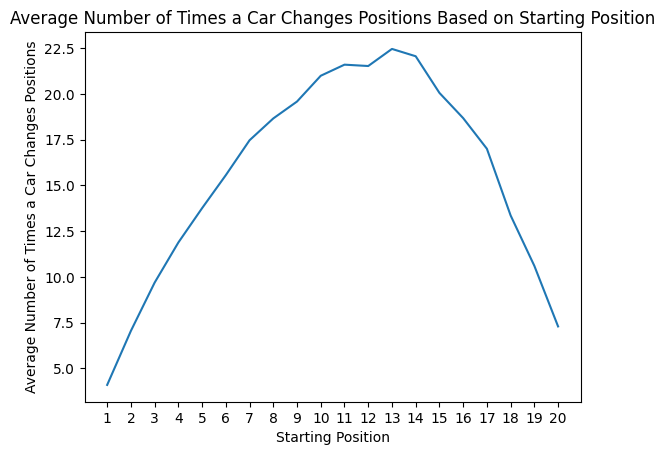

[ 0.          4.09650924  7.0513347   9.68788501 11.88090349 13.75770021
 15.56262834 17.46817248 18.66119097 19.58521561 20.99383984 21.59958932
 21.52566735 22.45995893 22.05954825 20.05749487 18.67967146 17.00410678
 13.35934292 10.6036961   7.2936345 ]


In [59]:
positions = np.linspace(1, 20, 20)
plt.plot(positions, changes[1:] / len(r))
plt.xticks(positions)
plt.xlabel('Starting Position')
plt.ylabel('Average Number of Times a Car Changes Positions')
plt.title('Average Number of Times a Car Changes Positions Based on Starting Position')
plt.show()
print(changes / len(r))
